# Thermo Properties


### Reading Polynomial parameters and Calculating Thermodynamic parameters

The thermo class given will be used to calculate the thermodynamic parameters. Also, you'll need [thermoDataNASA-9.yaml].  This file contains two arrays for each species for two separate temperature ranges: a_lo is for $200<T<1000$ K and a_hi is for $1000<T<6000$ K. We have followed Cantera nomenclature (http://www.cantera.org/docs/sphinx/html/cti/species.html#the-nasa-9-coefficient-polynomial-parameterization).


$$\frac{C^0_p(T)}{R_u}=a_0T^{−2}+a_1T^{−1}+a_2+a_3T+a_4T^2+a_5T^3+a_6T^4$$

$$\frac{H^0(T)}{R_u T}=−a_0T^{−2}+a_1 \frac{lnT}{T}+a_2+\frac{a_3}{2}T+\frac{a_4}{3}T^2+\frac{a_5}{4}T^3+\frac{a_6}{5}T^4+\frac{a_7}{T}$$

$$\frac{s^0(T)}{R_u}=−\frac{a_0}{2}T^{−2}−a_1T^{−1}+a_2 lnT+a_3T+\frac{a_4}{2}T^2+\frac{a_5}{3}T^3+\frac{a_6}{4}T^4+a_8$$

where $R_u = 8.31446 J/mol/K$ is the universal gas constant.

Note that Gordon and McBride start polynomial coefficient numbering at 1 and the last coeffients for enthalpy and entropy are named respectively $a_7 = b_1$ and $a_8 = b_2$. (http://ntrs.nasa.gov/archive/nasa/casi.ntrs.nasa.gov/20020085330_2002141071.pdf)

In [9]:
# This cell of code give you an implementation of the above formulas.
import yaml
import numpy as np

class thermo:
    
    def __init__(self, species, MW) :
        """
        species: input string name of species in thermoData.yaml
        M: input (species molecular weight, kg/kmol)
        """
        
        self.Rgas = 8.31446      # J/mol*K
        self.M    = MW
    
        with open("thermoDataNASA-9.yaml") as yfile:
           yfile = yaml.safe_load(yfile)
        
        self.a_lo = yfile[species]["a_lo"]
        self.a_hi = yfile[species]["a_hi"]
        
        self.T_lo = 200.
        self.T_mid = 1000.
        self.T_hi = 6000.
        
    def cymalalo(self) :
        return self.a_lo

    def cymalahi(self) :
        return self.a_hi

    def cp_mole(self,T) :
        """
        return calorific value at cst p in units J/kmol/K
        T: input (K)
        """
        if T<=self.T_mid and T>=self.T_lo :
            a = self.a_lo
        elif T>self.T_mid and T<=self.T_hi :
            a = self.a_hi
        else :
            print ("ERROR: temperature is out of range")

        cp = a[0]/T**2 + a[1]/T + a[2] + a[3]*T + a[4]*T**2.0 + a[5]*T**3 + a[6]*T**4
        
        return cp * self.Rgas
        
    #--------------------------------------------------------

    def cp_mass(self,T) :
        """
        return calorific value at cst P in units of J/kg/K
        T: input (K)
        """
        return self.cp_mole(T)/self.M

    #--------------------------------------------------------
    
    def h_mole(self,T) :
        """
        return enthalpy in units of J/mol
        T: input (K)
        """
        if T<=self.T_mid and T>=self.T_lo :
            a = self.a_lo
        elif T>self.T_mid and T<=self.T_hi :
            a = self.a_hi
        else :
            print ("ERROR: temperature is out of range")

        hrt = -a[0]/T**2 + a[1]*np.log(T)/T + a[2] + a[3]/2*T + a[4]/3*T**2.0 + a[5]/4*T**3 + a[6]/5*T**4 + a[7]/T
        
        return hrt * self.Rgas * T
        
    #--------------------------------------------------------

    def h_mass(self,T) :
        """
        return enthalpy in units of J/kg
        T: input (K)
        """
        return self.h_mole(T)/self.M

    #--------------------------------------------------------
        
    def s_mole(self,T) :
        """
        return entropy in units of J/mol/K
        T: input (K)
        """
        if T<=self.T_mid and T>=self.T_lo :
            a = self.a_lo
        elif T>self.T_mid and T<=self.T_hi :
            a = self.a_hi
        else :
            print ("ERROR: temperature is out of range")
        
        sr = -a[0]/2/T**2 - a[1]/T + a[2]*np.log(T) + a[3]*T + a[4]/2.0*T**2.0 + a[5]/3.0*T**3.0+ a[6]/4.0*T**4.0+ a[8]
        
        return sr * self.Rgas
        
    #--------------------------------------------------------

    def s_mass(self,T) :
        """
        return entropy in units of J/kg/K
        T: input (K)
        """
        return self.s_mole(T)/self.M

In [10]:
# Example on how to use the class thermo to calculate thermodynamics 
# quantities for a specific species.
Molecule = "C8H18"    
MW_molecule = 114               # kg/kmol

t = thermo(Molecule,MW_molecule) # thermo object;
Temperature = 2000       #K
print('Enthalpy of ',Molecule,' at ',str(Temperature), 'K: ',t.h_mole(Temperature),' J/mol')
print('Entropy of ',Molecule,' at ',str(Temperature), 'K: ',t.s_mole(Temperature),' J/mol-K')
print('Specific heat of ',Molecule,' at ',str(Temperature), 'K: ',t.cp_mole(Temperature),' J/mol')


Enthalpy of  C8H18  at  2000 K:  552095.8600782972  J/mol
Entropy of  C8H18  at  2000 K:  1171.1651410939687  J/mol-K
Specific heat of  C8H18  at  2000 K:  593.5354818172497  J/mol


In [11]:
# If you wish to use this piece of code embedded in another code, you might need the following lines:
# Careful, you might need the following function the first time you are using # the code: "!pip install ipynb"
#from ipynb.fs.full.ThermoPropertiesNASA import thermo

# Try it out in a new script, if it works, it should display the same results than the cell above
# If it works, just copy the content of the previous cell in your new script, and adapt it to your needs

In [12]:
# Temperature = 300
# HHV = -1*thermo('C8H18',114).h_mole(Temperature) - 12.5*thermo('O2',32).h_mole(Temperature) + 8*thermo('CO2',44).h_mole(Temperature) + 9*(-285820)
# print(HHV)

In [13]:
import numpy as np
import matplotlib.pyplot as plt

phi=np.arange(0.5,1.55,0.05)
Tf = np.empty(21)

T_ref = 298.15 #K
R = 8.3144621
Cp = 3.5 * R

def h_gap_lean(phi):
    delta_h = - phi * thermo('C8H18',114).h_mole(T_ref) - 12.5 * thermo('O2',32).h_mole(T_ref) \
        + 8 * phi * thermo('CO2',44).h_mole(T_ref) + 9 * phi * thermo('H2O',18).h_mole(T_ref) \
        + (12.5 - 12.5 * phi) * thermo('O2',32).h_mole(T_ref) 
        
    return delta_h

def h_gap_rich(phi):
    delta_h = - phi * thermo('C8H18',114).h_mole(T_ref) - 12.5 * thermo('O2',32).h_mole(T_ref) \
    + 0.8 * phi * thermo('CO',28).h_mole(T_ref) \
    + 7.2 * phi * thermo('CO2',44).h_mole(T_ref) \
    + (25-15.2*phi) * thermo('H2O',18).h_mole(T_ref) \
    + (24.2 * phi - 25) * thermo('H2',2).h_mole(T_ref) 
    
    return delta_h


def calculate_Tf():
    for a in range (len(phi)):
        if phi[a] == 1 or phi[a] < 1:
            Tf[a] = (- h_gap_lean(phi[a])) /(Cp*(4.5*phi[a] + 47 + 12.5)) + T_ref
        else:
            Tf[a] = (- h_gap_rich(phi[a])) / (Cp*( - 15.2 * phi[a] + 8*phi[a] + 24.2*phi[a] + 47)) + T_ref

calculate_Tf()
print(Tf)

[1717.34254487 1853.59418895 1988.86008963 2123.15090572 2256.47714292
 2388.84915656 2520.27715425 2650.77119855 2780.34120948 2908.99696711
 3019.07299212 2957.49607732 2897.5124769  2839.06113976 2782.0840945
 2726.52625769 2672.33525624 2619.46126268 2567.85684241 2517.47681174
 2468.27810592]


In [14]:
#from P2Q3 import phi #h_gap_rich, R #h_gap_lean, R
from scipy.integrate import quad 
from scipy.optimize import fsolve as solve
import numpy as np

Tf_int = np.empty(21)

def Cp_lean(Tad):
    return 8 * phi[a] * thermo('CO2',44).cp_mole(Tad) + 9 * phi[a] * thermo('H2O',18).cp_mole(Tad) \
        + (12.5 - 12.5 * phi[a]) * thermo('O2',32).cp_mole(Tad) + 47 * thermo('N2',28).cp_mole(Tad)

def h_int_lean(Tad):
    #print(quad(Cp_lean(Tad), T_ref, Tad)[0])
    return quad(Cp_lean, T_ref, Tad)[0]

def h_gap_lean():
    x = 0.0
    x = phi[a]
    delta_h = - x * thermo('C8H18',114).h_mole(T_ref) - 12.5 * thermo('O2',32).h_mole(T_ref) \
        + 8 * x * thermo('CO2',44).h_mole(T_ref) + 9 * x * thermo('H2O',18).h_mole(T_ref) \
        + (12.5 - 12.5 * x) * thermo('O2',32).h_mole(T_ref) 
    return delta_h

def lean_gap(Tad):
    return h_gap_lean() + h_int_lean(Tad)


def Cp_rich(Tad):
    Cp = 0.8 * phi[a] * thermo('CO',28).cp_mole(Tad) \
    + 7.2 * phi[a] * thermo('CO2',44).cp_mole(Tad) \
    + (25-15.2*phi[a]) * thermo('H2O',18).cp_mole(Tad) \
    + (24.2 * phi[a] - 25) * thermo('H2',2).cp_mole(Tad) + 47 * thermo('N2',28).cp_mole(Tad)

    return Cp

def h_int_rich(Tad):
    return quad(Cp_rich, T_ref, Tad)[0]

def h_gap_rich():
    delta_h = - phi[a] * thermo('C8H18',114).h_mole(T_ref) - 12.5 * thermo('O2',32).h_mole(T_ref) \
    + 0.8 * phi[a] * thermo('CO',28).h_mole(T_ref) \
    + 7.2 * phi[a] * thermo('CO2',44).h_mole(T_ref) \
    + (25-15.2*phi[a]) * thermo('H2O',18).h_mole(T_ref) \
    + (24.2 * phi[a] - 25) * thermo('H2',2).h_mole(T_ref) 
    return delta_h

def rich_gap(Tad):
    return h_gap_rich() + h_int_rich(Tad)

    

for a in range(len(phi)):
    if phi[a] == 1 or phi[a] < 1:
        Tf_int[a] = solve(lean_gap, 1000)
        print(Tf_int[a])
    else:
        Tf_int[a] = solve(rich_gap, 1000)
        print(Tf_int[a])
print(Tf_int)

1511.9443032754539
1611.5035784888616
1708.3563540592709
1802.670530666106
1894.5894745278595


KeyboardInterrupt: 

# PART 3 starts

In [15]:
%matplotlib inline
%config InlineBackend.figure_formats = ["svg"]
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 120

print(f"Using Cantera version: {ct.__version__}")

Using Cantera version: 2.5.1


In [26]:
# Get all of the Species objects defined in the GRI 3.0 mechanism
species = {S.name: S for S in ct.Species.listFromFile("Jerzembeck.cti")}

# Create an IdealGas object with species representing complete combustion
complete_species = [species[S] for S in ("IXC8H18", "O2", "N2", "CO2", "H2O")]
gas1 = ct.Solution('Jerzembeck.cti')

phi = np.arange(0.5, 2.0, 0.05)
T_complete = np.zeros(phi.shape)
for i in range(len(phi)):
    gas1.TP = 300, ct.one_atm
    gas1.set_equivalence_ratio(phi[i], "IXC8H18", "O2:1, N2:3.76")
    gas1.equilibrate("HP")
    T_complete[i] = gas1.T
    
print(T_complete)

[1511.33968618 1609.68816689 1704.82397359 1796.71843995 1885.16694087
 1969.67783771 2049.31451015 2122.50123641 2186.81928887 2238.78256956
 2273.55993912 2285.63328723 2273.848529   2245.77255763 2210.23615259
 2171.9530556  2132.87417781 2093.79879344 2055.06876014 2016.83220839
 1979.14912997 1942.03744474 1905.49465074 1869.50852348 1834.06253484
 1799.13859618 1764.71840715 1730.78407195 1697.31833378 1664.30461651]


In [27]:
# Create an IdealGas object including incomplete combustion species
gas2 = ct.Solution('Jerzembeck.cti')
T_incomplete = np.zeros(phi.shape)
for i in range(len(phi)):
    gas2.TP = 300, ct.one_atm
    gas2.set_equivalence_ratio(phi[i], "IXC8H18", "O2:1, N2:3.76")
    gas2.equilibrate("HP")
    T_incomplete[i] = gas2.T

print(T_incomplete)

[1511.33968618 1609.68816689 1704.82397359 1796.71843995 1885.16694087
 1969.67783771 2049.31451015 2122.50123641 2186.81928887 2238.78256956
 2273.55993912 2285.63328723 2273.848529   2245.77255763 2210.23615259
 2171.9530556  2132.87417781 2093.79879344 2055.06876014 2016.83220839
 1979.14912997 1942.03744474 1905.49465074 1869.50852348 1834.06253484
 1799.13859618 1764.71840715 1730.78407195 1697.31833378 1664.30461651]


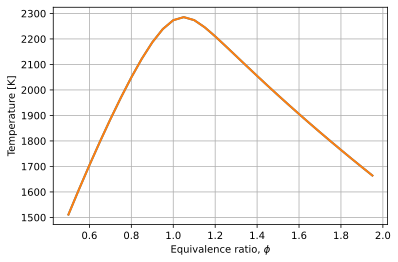

In [30]:
plt.plot(phi, T_complete, label="complete combustion", lw=2)
plt.plot(phi, T_incomplete, label="incomplete combustion", lw=2)
plt.grid(True)
plt.xlabel(r"Equivalence ratio, $\phi$")
plt.ylabel("Temperature [K]");